# K-Nearest Neighbors Algorithm

In [45]:
using RDatasets
using Plots
using CSV
theme(:dark)

In [34]:
iris = dataset("datasets", "iris")

# get the first 30 setosa data leaving out 20 in order to use for test data
x_data = [x for x in zip(iris.SepalLength[1:30], iris.SepalWidth[1:30], iris.PetalLength[1:30])]
y_data = [iris.Species[i] for i = 1:30]

# applying the same for versicolor and virginica
for i = 51:80
    push!(x_data, (iris.SepalLength[i], iris.SepalWidth[i], iris.PetalLength[i]))
    push!(y_data, "versicolor")
end

for i = 101:130
    push!(x_data, (iris.SepalLength[i], iris.SepalWidth[i], iris.PetalLength[i]))
    push!(y_data, "virginica")
end

In [35]:
y_data[60]

CategoricalValue{String,UInt8} "versicolor"

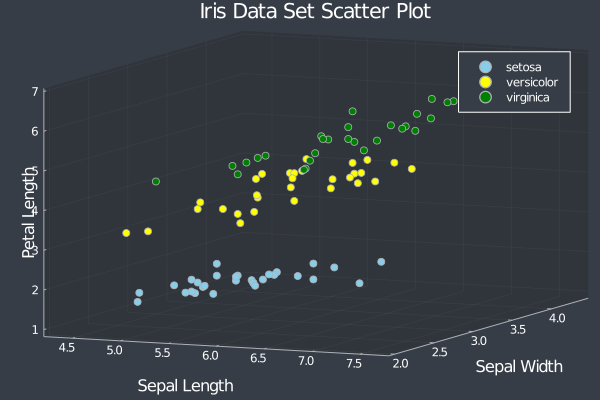

In [46]:
scatter(xaxis = "Sepal Length",
        yaxis = "Sepal Width", 
        zaxis = "Petal Length",
        title = "Iris Data Set Scatter Plot")

scatter!(x_data[1:30], 
        label = "setosa", 
        color = "skyblue")

scatter!(x_data[31:60], 
        label = "versicolor", 
        color = "yellow")

scatter!(x_data[61:90], 
        label = "virginica", 
        color = "green")

In [37]:
# Define the Euclidean distance formula as a function
function distance(p1, p2)
    return sqrt(sum([(p1[i] - p2[i])^2 for i = 1:length(p1)]))
end

# Test the function euclidean_distance to make sure it works!
print("The distance between ", x_data[1]," and ", x_data[50])
println(" is ", distance(x_data[1], x_data[50]));

The distance between (5.1, 3.5, 1.4) and (5.6, 2.5, 3.9) is 2.7386127875258306


In [26]:
function KNN(target, feature_array, label_array, k)
    distance_array = [(feature_array[i], label_array[i], distance(target, feature_array[i]))
                        for i = 1:length(feature_array)
                        if target != feature_array[i]
                        ]
    
    sort!(distance_array, by = x -> x[3])
    
    return distance_array[1:k]
end

KNN (generic function with 1 method)

In [47]:
test_point(i) = (iris.SepalLength[i], iris.SepalWidth[i], iris.PetalLength[i])

test_point (generic function with 1 method)

In [57]:
function show_neighbors(i, feature_array, label_array, k)
    println("")
    println("Target Point P = ", test_point(i))
    println("Target Label = ", iris.Species[i])
    println("k = ", k)
    println("____________________________________")
    test = KNN(test_point(i), feature_array, label_array, k)
    for i = 1:length(test)
        println("Point $i = ", test[i][1])
        println("Point Label = ", test[i][2])
        println("Point Distance = ", test[i][3])
        if i != length(test)
            println("")
        end 
    end
    println("____________________________________")
    println("")
    
    scatter(xaxis = "Sepal Length",
            yaxis = "Sepal Width", 
            zaxis = "Petal Length",
            title = "Iris Data Set Scatter Plot")

    scatter!(x_data[1:30], 
            label = "setosa", 
            color = "skyblue")

    scatter!(x_data[31:60], 
            label = "versicolor", 
            color = "yellow")

    scatter!(x_data[61:90], 
            label = "virginica", 
            color = "green")
    
    scatter!([test_point(i)],
            label = "test point",
            color = "red")
    
    for j = 1:length(test)
        plot!([test_point(i), test[j][1]],
            label = false,
            color = "red")
    end
    scatter!()  
end

show_neighbors (generic function with 1 method)


Target Point P = (4.8, 3.4, 1.9)
Target Label = setosa
k = 4
____________________________________
Point 1 = (4.8, 3.4, 1.6)
Point Label = setosa
Point Distance = 0.2999999999999998

Point 2 = (5.0, 3.4, 1.6)
Point Label = setosa
Point Distance = 0.3605551275463989

Point 3 = (4.7, 3.2, 1.6)
Point Label = setosa
Point Distance = 0.3741657386773938

Point 4 = (5.1, 3.3, 1.7)
Point Label = setosa
Point Distance = 0.374165738677394
____________________________________



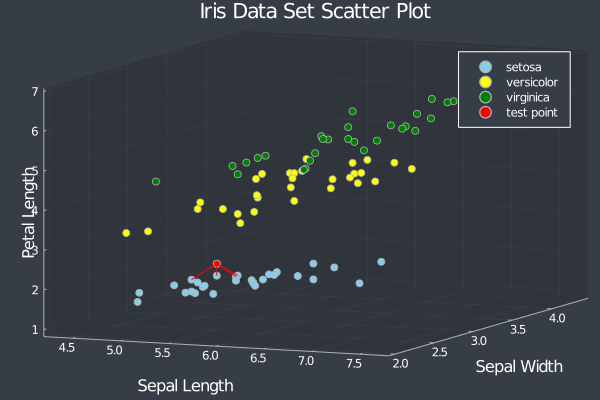

In [59]:
show_neighbors(25, x_data, y_data, 4)

In [60]:
function predict(i, feature_array, label_array, k)
    point = test_point(i)
    KNN_array = KNN(point, feature_array, label_array, k)
    setosa_count = sum([1 for x in KNN_array if x[2] == "setosa"])
    versicolor_count = sum([1 for x in KNN_array if x[2] == "versicolor"])
    virginica_count = sum([1 for x in KNN_array if x[2] == "virginica"])
    
    count_array = [("setosa", setosa_count), ("versicolor", versicolor_count), ("virginica", virginica_count)]
    sort!(count_array, by = x -> x[2])
    
    return count_array[end][1]
end

predict (generic function with 1 method)

In [61]:
predict(143, x_data, y_data, 6)

"virginica"

In [62]:
iris.Species[143]

CategoricalValue{String,UInt8} "virginica"

In [63]:
movies = CSV.read("movies_recommendation_data.csv")

┌ Warning: `CSV.read(input; kw...)` is deprecated in favor of `using DataFrames; CSV.read(input, DataFrame; kw...)
│   caller = read(::String) at CSV.jl:40
└ @ CSV C:\Users\Jake Zhu\.julia\packages\CSV\MKemC\src\CSV.jl:40


,MovieID,MovieName,IMDBRating,Biography,Drama,Thriller
,Int64,String,Float64,Int64,Int64,Int64
1,58,The Imitation Game,8.0,1,1,1
2,8,Ex Machina,7.7,0,1,0
3,46,A Beautiful Mind,8.2,1,1,0
4,62,Good Will Hunting,8.3,0,1,0
5,97,Forrest Gump,8.8,0,1,0
6,98,21,6.8,0,1,0
7,31,Gifted,7.6,0,1,0
8,3,Travelling Salesman,5.9,0,1,0
9,51,Avatar,7.9,0,0,0
